# Credit Default Prediction

ref: https://github.com/PacktPublishing/Python-for-Finance-Cookbook/tree/master/Chapter%2008

If you’re looking for a standard boilerplate to analyse tabular data for classification task, this is for you!

There are 9 steps in this notebook:
1. Load and Manage Data
2. Exploratory Data Analysis
3. Split to Train and Test
4. Deal with Missing Values
5. Encode Categorical Variables
6. Fit Decision Tree Classifier
7. (optional) under/over-sampling for imbalanced data
8. Investigate Feature Importance
9. Implement Sklearn Pipeline
10. Hyperparameter Tuning



# Load and Manage Data

In [22]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Python-for-Finance-Cookbook/master/Datasets/credit_card_default.csv", index_col=0, na_values='')
df

,limit_bal,sex,education,marriage,age,payment_status_sep,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,payment_status_apr,bill_statement_sep,bill_statement_aug,bill_statement_jul,bill_statement_jun,bill_statement_may,bill_statement_apr,previous_payment_sep,previous_payment_aug,previous_payment_jul,previous_payment_jun,previous_payment_may,previous_payment_apr,default_payment_next_month
0,20000,Female,University,Married,24.0,Payment delayed 2 months,Payment delayed 2 months,Payed duly,Payed duly,Unknown,Unknown,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,Female,University,Single,26.0,Payed duly,Payment delayed 2 months,Unknown,Unknown,Unknown,Payment delayed 2 months,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,Female,University,Single,34.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,Female,University,Married,37.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,Male,University,Married,57.0,Payed duly,Unknown,Payed duly,Unknown,Unknown,Unknown,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,NaN,High school,Married,39.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,Male,High school,Single,43.0,Payed duly,Payed duly,Payed duly,Payed duly,Unknown,Unknown,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,Male,University,Single,37.0,Payment delayed 4 months,Payment delayed 3 months,Payment delayed 2 months,Payed duly,Unknown,Unknown,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,Male,High school,Married,41.0,Payment delayed 1 month,Payed duly,Unknown,Unknown,Unknown,Payed duly,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [2]:
# check dataframe memory usage
df.memory_usage(deep=True)

# # change type to save up memory
# object_columns = df.select_dtypes(include='object').columns
# df[object_columns] = df[object_columns].astype('category')

Index                          240000
limit_bal                      240000
sex                           1861704
education                     2060453
marriage                      1898935
age                            240000
payment_status_sep            2049276
payment_status_aug            2013568
payment_status_jul            2009431
payment_status_jun            1996729
payment_status_may            1987073
payment_status_apr            1989563
bill_statement_sep             240000
bill_statement_aug             240000
bill_statement_jul             240000
bill_statement_jun             240000
bill_statement_may             240000
bill_statement_apr             240000
previous_payment_sep           240000
previous_payment_aug           240000
previous_payment_jul           240000
previous_payment_jun           240000
previous_payment_may           240000
previous_payment_apr           240000
default_payment_next_month     240000
dtype: int64

In [3]:
X = df.copy()
y = X.pop('default_payment_next_month')

# Exploratory Data Analysis

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [5]:
# summary statistics
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
limit_bal,30000,NaN,NaN,NaN,167484,129748,10000,50000,140000,240000,1e+06
sex,29850,2,Female,18027,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,29850,4,University,13960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marriage,29850,3,Single,15891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,29850,NaN,NaN,NaN,35.4901,9.21785,21,28,34,41,79
payment_status_sep,30000,10,Unknown,17496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_status_aug,30000,10,Unknown,19512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_status_jul,30000,10,Unknown,19849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_status_jun,30000,10,Unknown,20803,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_status_may,30000,9,Unknown,21493,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


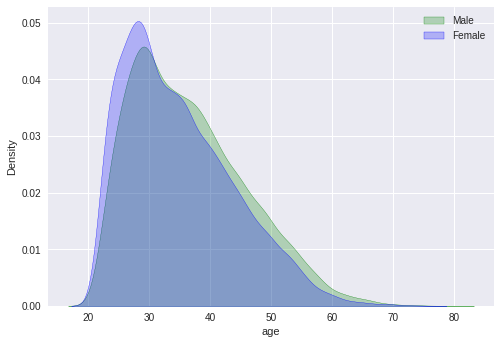

In [6]:
# distribution of age by gender
fig, ax = plt.subplots()
sns.distplot(df[df.sex=="Male"]["age"], hist=False, color="green", kde_kws={'shade': True}, ax=ax)
sns.distplot(df[df.sex=="Female"]["age"], hist=False, color="blue", kde_kws={'shade': True}, ax=ax)
ax.legend(["Male", "Female"])

Text(0.5, 1.05, 'Pairplot of selected variables')

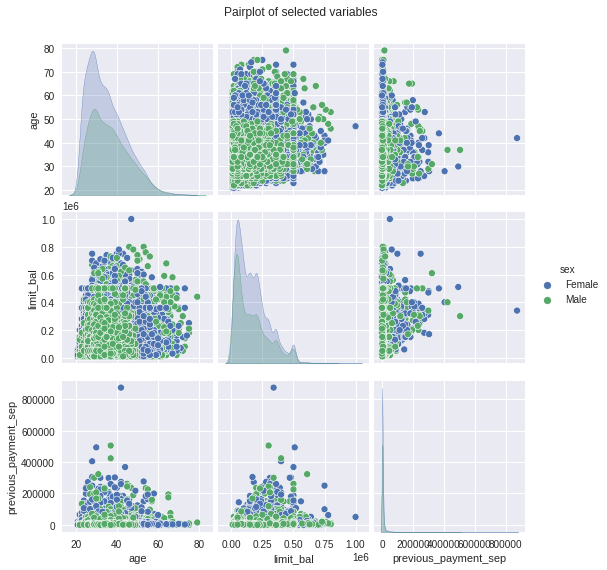

In [7]:
# pairplot of selected variables
pair_plot = sns.pairplot(df[['age', 'limit_bal', 'previous_payment_sep', "sex"]], hue="sex")
pair_plot.fig.suptitle('Pairplot of selected variables', y=1.05)

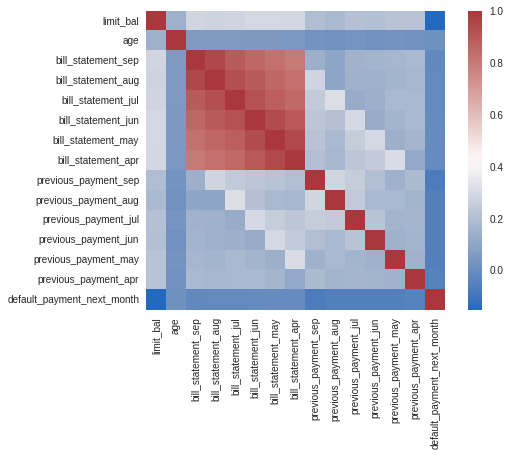

In [8]:
# correlation heatmap
corr_mat = df.select_dtypes(include='number').corr()    
sns.heatmap(corr_mat, square=True, cmap="vlag")

Text(0.5, 1.0, 'Distribution of limit balance per education level')

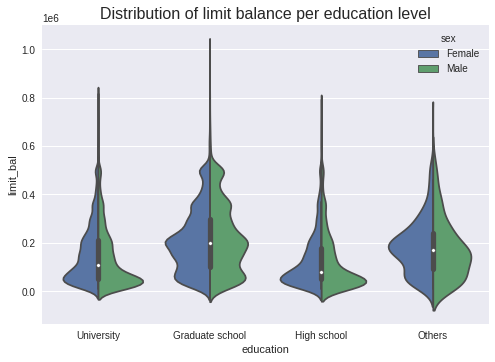

In [9]:
# distribution of limit balance per education level by sex
ax = sns.violinplot(x='education', y='limit_bal', 
                    hue='sex', split=True, data=df)
ax.set_title('Distribution of limit balance per education level', 
             fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of the target variable')

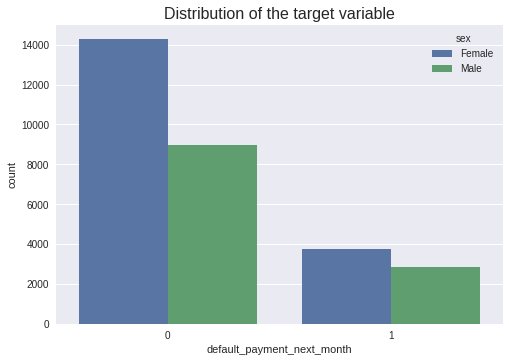

In [10]:
# distribution of target by sex
ax = sns.countplot('default_payment_next_month', hue='sex', 
                   data=df, orient='h')
ax.set_title('Distribution of the target variable', fontsize=16)

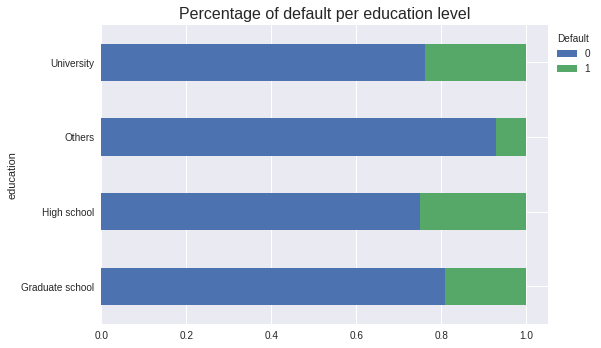

In [11]:
# percentage of target by education
ax = df.groupby('education')['default_payment_next_month'] \
       .value_counts(normalize=True) \
       .unstack() \
       .plot(kind='barh', stacked='True')
ax.set_title('Percentage of default per education level', 
             fontsize=16)
ax.legend(title='Default', bbox_to_anchor=(1,1)) 

# Split to Training and Test Dataset

In [12]:
from sklearn.model_selection import train_test_split

# ensure uniform label distribution for train and test by stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

# Deal with Missing Values

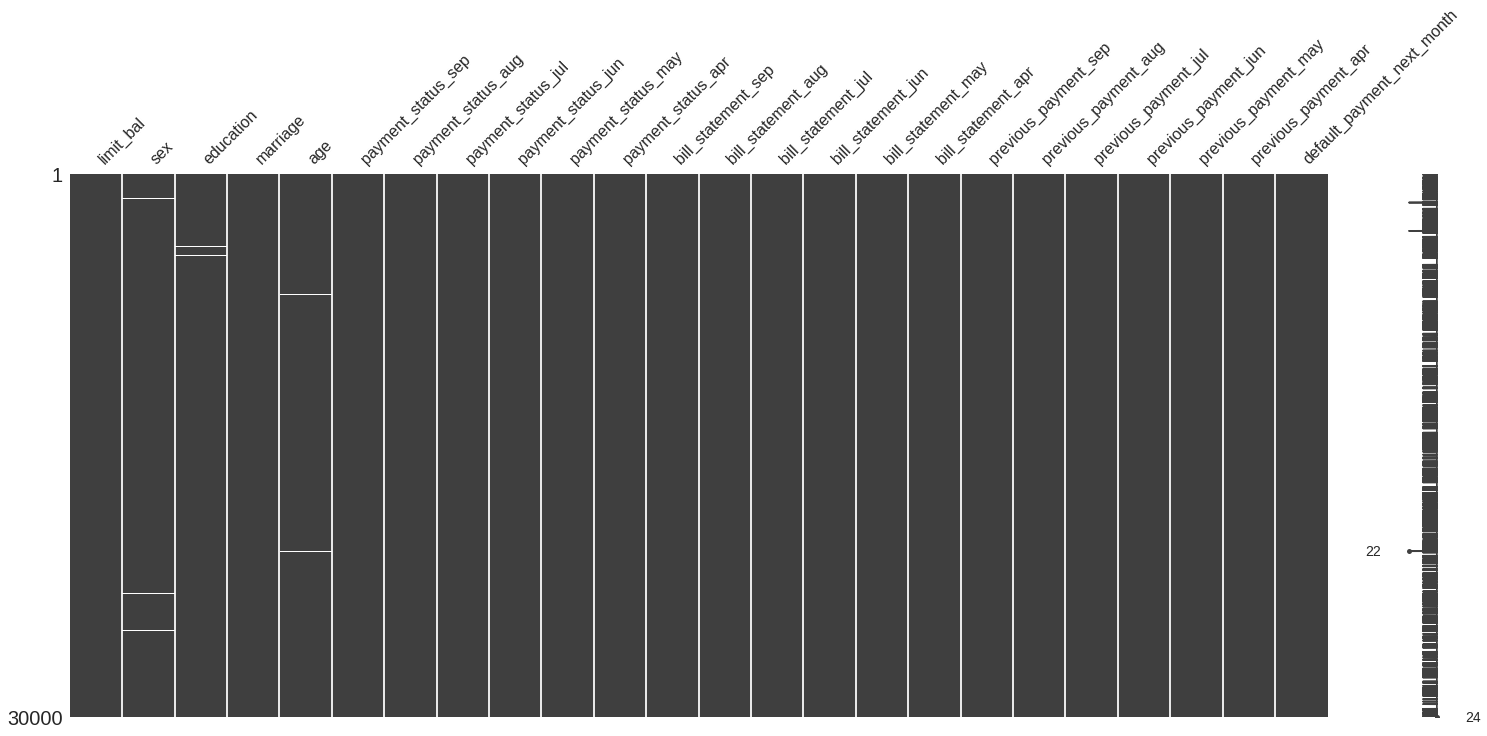

In [13]:
# Visualise Missing Data
import missingno
missingno.matrix(df)

In [14]:
# Impute Missing Values

from sklearn.impute import SimpleImputer

# impute numerical features
NUM_FEATURES = ['age']
for col in NUM_FEATURES:
    num_imputer = SimpleImputer(strategy='median')
    num_imputer.fit(X_train[[col]])
    X_train.loc[:, col] = num_imputer.transform(X_train[[col]])
    X_test.loc[:, col] = num_imputer.transform(X_test[[col]])

# impute categorical variables
CAT_FEATURES = ['sex', 'education', 'marriage']
for col in CAT_FEATURES:
    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_imputer.fit(X_train[[col]])
    X_train.loc[:, col] = cat_imputer.transform(X_train[[col]])
    X_test.loc[:, col] = cat_imputer.transform(X_test[[col]])

# Encoding Categorical Variables

In [15]:
# Fit One Hot Encoder and Column Transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

CAT_FEATURES = X_train.select_dtypes(include='object').columns.tolist()
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='error', drop='first')
one_hot_transformer = ColumnTransformer([("one_hot", one_hot_encoder, CAT_FEATURES)]) 
one_hot_transformer.fit(X_train)
col_names = one_hot_transformer.get_feature_names()

# transform train data
X_train_cat = pd.DataFrame(one_hot_transformer.transform(X_train), 
                           columns=col_names, 
                           index=X_train.index)
X_train_ohe = pd.concat([X_train, X_train_cat], axis=1) \
                .drop(CAT_FEATURES, axis=1)

# transform test data
X_test_cat = pd.DataFrame(one_hot_transformer.transform(X_test), 
                          columns=col_names, 
                          index=X_test.index)
X_test_ohe = pd.concat([X_test, X_test_cat], axis=1) \
               .drop(CAT_FEATURES, axis=1)

# alternative. But can't use in sklearn pipeline
# pd.get_dummies(X_train, prefix_sep='_', drop_first=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# Fit Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4673
           1       0.37      0.40      0.39      1327

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.60      6000
weighted avg       0.73      0.72      0.72      6000

confusion matrix
ROC Curve
Precision Recall Curve


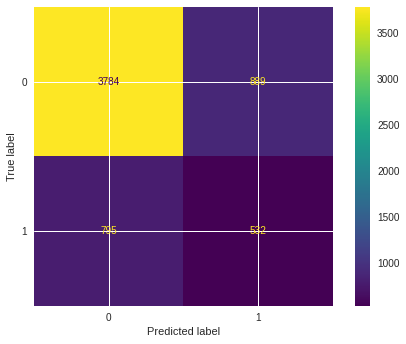

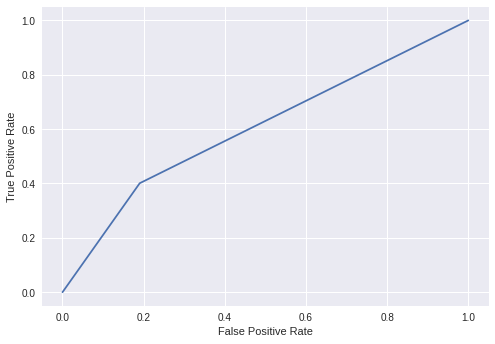

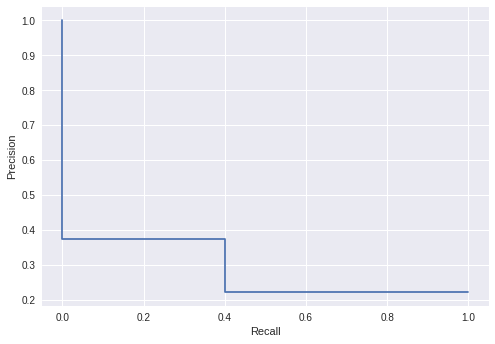

In [16]:
# Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train_ohe, y_train)
y_test_pred = tree_classifier.predict(X_test_ohe)

# Evaluate Classifier
print(classification_report(y_test, y_test_pred))

print("confusion matrix")
cm = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

print("ROC Curve")
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print("Precision Recall Curve")
prec, recall, _ = precision_recall_curve(y_test, y_test_pred)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

In [17]:
# Visualise Decision Tree
from sklearn.tree import export_graphviz
from io import StringIO
from ipywidgets import Image
import pydotplus

LABELS = ['No Default', 'Default']
small_tree = DecisionTreeClassifier(max_depth=3, 
                                    random_state=42)
small_tree.fit(X_train_ohe, y_train)

tree_dot = StringIO()
export_graphviz(small_tree, feature_names=X_train_ohe.columns,
                class_names=LABELS, rounded=True, out_file=tree_dot,
                proportion=False, precision=2, filled=True)
tree_graph = pydotplus.graph_from_dot_data(tree_dot.getvalue())  
tree_graph.set_dpi(300) 
Image(value=tree_graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x15\x16\x00\x00\x07\x0c\x08\x06\x00\x00\x00|\xff\x1b…

# (Optional) Under/Over-sampling for Imbalanced Data

In [18]:
# # Under-sampling
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler()
# X_rus, y_rus = rus.fit_resample(X_train_ohe, y_train)
# tree_classifier.fit(X_rus, y_rus)

In [19]:
# # Over-sampling
# from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

# ros = RandomOverSampler()
# X_ros, y_ros = ros.fit_resample(X_train_ohe, y_train)
# tree_classifier.fit(X_ros, y_ros)

# X_smote, y_smote = SMOTE().fit_resample(X_train_ohe, y_train)
# tree_classifier.fit(X_smote, y_smote)

# X_adasyn, y_adasyn = ADASYN().fit_resample(X_train_ohe, y_train)
# tree_classifier.fit(X_adasyn, y_adasyn)


In [20]:
# # balanced classifier weight
# tree_classifier = DecisionTreeClassifier(random_state=42, class_weight="balanced")


# Investigate Feature Importance

There are three methods:
1. Sklearn feature importance
2. Permutation importance


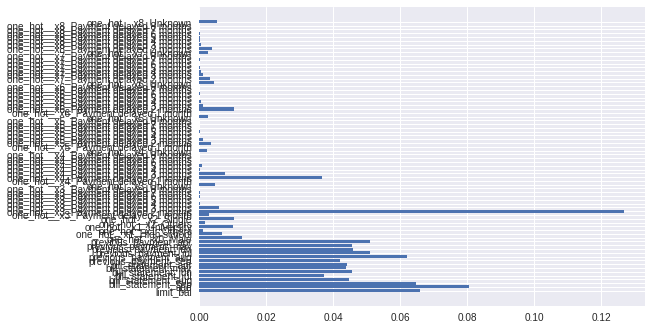

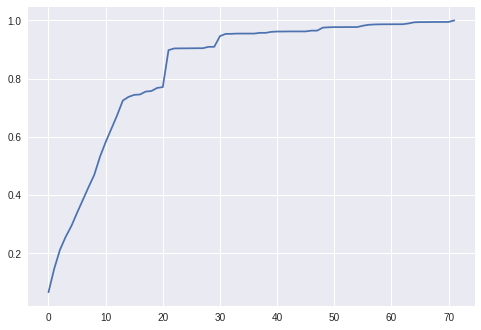

In [23]:
# Sklearn feature importance

# tree_classifier
feature_names = X_train_ohe.columns

plt.barh(feature_names, tree_classifier.feature_importances_)
plt.show()

plt.plot(np.cumsum(tree_classifier.feature_importances_))
plt.show()

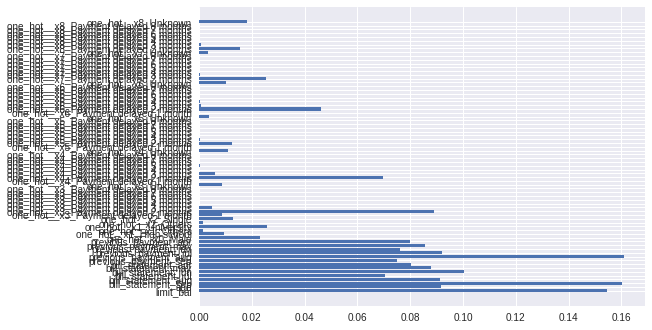

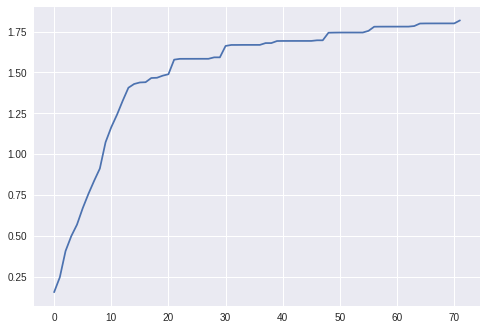

In [24]:
# Permutation Importance
# !pip install eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(tree_classifier, n_iter = 25, 
                             random_state=42)
perm.fit(X_train_ohe, y_train)

feature_names = X_train_ohe.columns
plt.barh(feature_names, perm.feature_importances_)
plt.show()

plt.plot(np.cumsum(perm.feature_importances_))
plt.show()

# Implement Sklearn Pipeline
integrate the first 6 steps

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# LOAD DATA
df = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Python-for-Finance-Cookbook/master/Datasets/credit_card_default.csv", index_col=0, na_values='')

# SPLIT DATA
X = df.copy()
y = X.pop('default_payment_next_month')

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

# PREPROCESSING
num_features = X_train.select_dtypes(include='number') \
                      .columns \
                      .to_list()
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    # ('minmaxscaler', MinMaxScaler())
    # ('standardscaler', StandardScaler())
])

cat_features = X_train.select_dtypes(include='object') \
                      .columns \
                      .to_list()
cat_list = [list(X_train[col].dropna().unique()) for col in cat_features]
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(categories=cat_list, sparse=False, 
                             handle_unknown='error', drop='first'))
])

preprocessor = ColumnTransformer(transformers=[
    ('numerical', num_pipeline, num_features),
    ('categorical', cat_pipeline, cat_features)],
    remainder='drop')

# CLASSIFIER
dec_tree = DecisionTreeClassifier(random_state=42)

# COMPLETE PIPELINE
tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', dec_tree)])

# Evaluate Pipeline
tree_pipeline.fit(X_train, y_train)
y_pred_test = tree_pipeline.predict(X_test)
y_pred_test

array([0, 1, 1, ..., 0, 0, 0])

# Hyperparameter Tuning

In [26]:
# Tune with Grid Search and k-fold cross validation

from sklearn.model_selection import (GridSearchCV, cross_val_score, 
                                     RandomizedSearchCV, cross_validate, 
                                     StratifiedKFold)
from sklearn import metrics

# Evaluate Pipeline once
# cross_validate(tree_pipeline, X_train, y_train, cv=k_fold, 
#                scoring=['accuracy', 'precision', 'recall', 
#                         'roc_auc'])

# Define Cross-Validation and Grid Search
k_fold = StratifiedKFold(5, shuffle=True, random_state=42)
param_grid = {'classifier__criterion': ['entropy', 'gini'],
              'classifier__max_depth': range(9, 11),
              'classifier__min_samples_leaf': range(9, 11)}
classifier_gs = GridSearchCV(tree_pipeline, param_grid, scoring='recall', 
                             cv=k_fold, n_jobs=-1, verbose=1)

classifier_gs.fit(X_train, y_train)

# Evaluate
print(f'Best parameters: {classifier_gs.best_params_}') 
print(f'Recall (Training set): {classifier_gs.best_score_:.4f}') 
print(f'Recall (Test set): {metrics.recall_score(y_test, classifier_gs.predict(X_test)):.4f}')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 9}
Recall (Training set): 0.3816
Recall (Test set): 0.3610


              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4673
           1       0.59      0.36      0.45      1327

    accuracy                           0.80      6000
   macro avg       0.71      0.64      0.66      6000
weighted avg       0.78      0.80      0.78      6000

confusion matrix
ROC Curve
Precision Recall Curve


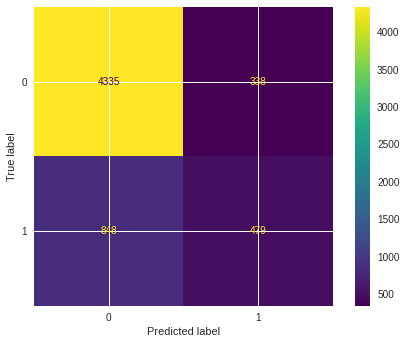

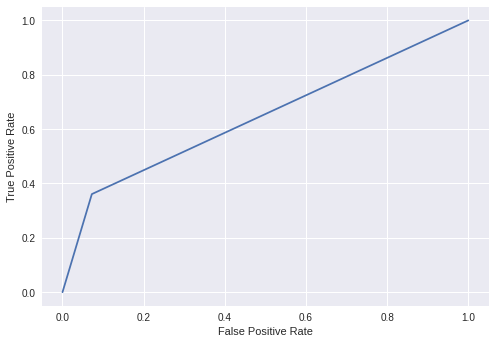

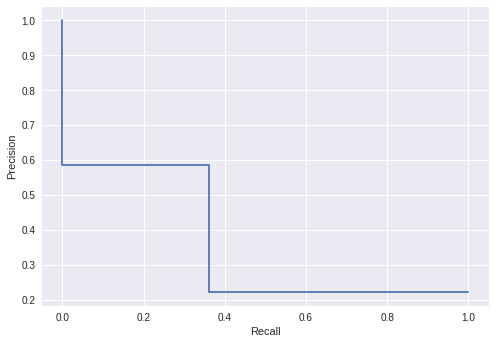

In [27]:
# Evaluate
y_test_pred = classifier_gs.predict(X_test)

# Evaluate Classifier
print(classification_report(y_test, y_test_pred))

print("confusion matrix")
cm = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

print("ROC Curve")
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print("Precision Recall Curve")
prec, recall, _ = precision_recall_curve(y_test, y_test_pred)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

In [ ]:
# More Complex Grid Search. Add Other models
from sklearn.model_selection import (GridSearchCV, cross_val_score, 
                                     RandomizedSearchCV, cross_validate, 
                                     StratifiedKFold)
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

import numpy as np

k_fold = StratifiedKFold(5, shuffle=True, random_state=42)

param_grid = [
    {'classifier': [LogisticRegression()],
      'classifier__penalty': ['l1', 'l2'],
      'classifier__C': np.logspace(0, 3, 10, 2)},
    {'classifier': [DecisionTreeClassifier(random_state=42)],
      'classifier__criterion': ['entropy', 'gini'],
      'classifier__max_depth': range(8, 11),
      'classifier__min_samples_leaf': range(8, 11)},
    {'classifier': [RandomForestClassifier()],
     'classifier__n_estimators': np.linspace(100, 1000, 10, dtype=int),
     'classifier__max_features': ['log2', 'sqrt', None],
     'classifier__max_depth': np.arange(3, 11, 1, dtype=int),
     'classifier__min_samples_split': [2, 5, 10],
     'classifier__min_samples_leaf': np.arange(1, 51, 2, dtype=int),
     'classifier__bootstrap': [True, False]},
    {'classifier': [GradientBoostingClassifier()],
     'classifier__n_estimators': np.linspace(100, 1000, 10, dtype=int),
     'classifier__learning_rate': np.arange(0.05, 0.31, 0.05),
     'classifier__max_depth': np.arange(3, 11, 1, dtype=int),
     'classifier__min_samples_split': np.linspace(0.1, 0.5, 12),
     'classifier__min_samples_leaf': np.arange(1, 51, 2, dtype=int),
     'classifier__max_features':['log2', 'sqrt', None]},
    {'classifier': [XGBClassifier()],
     'classifier__n_estimators': np.linspace(100, 1000, 10, dtype=int),
     'classifier__learning_rate': np.arange(0.05, 0.31, 0.05),
     'classifier__max_depth': np.arange(3, 11, 1, dtype=int),
     'classifier__min_child_weight': np.arange(1, 8, 1, dtype=int),
     'classifier__colsample_bytree': np.linspace(0.3, 1, 7)},
    {'classifier': [LGBMClassifier()],
     'classifier__n_estimators': np.linspace(100, 1000, 10, dtype=int),
     'classifier__learning_rate': np.arange(0.05, 0.31, 0.05),
     'classifier__max_depth': np.arange(3, 11, 1, dtype=int),
     'classifier__colsample_bytree': np.linspace(0.3, 1, 7)},
    {'classifier': [StackingClassifier(
          [('dec_tree', DecisionTreeClassifier()), ('log_reg', LogisticRegression())],
          final_estimator=LogisticRegression(),
          cv=k_fold,
          n_jobs=-1 
        )]
    }
]

classifier_gs = GridSearchCV(tree_pipeline, param_grid, scoring='recall', 
                             cv=k_fold, n_jobs=-1, verbose=1)

classifier_gs.fit(X_train, y_train)

# Evaluate
print(f'Best parameters: {classifier_gs.best_params_}') 
print(f'Recall (Training set): {classifier_gs.best_score_:.4f}') 
print(f'Recall (Test set): {metrics.recall_score(y_test, classifier_gs.predict(X_test)):.4f}')

In [37]:
# Bayesian Optimisation
# need access to X_train_ohe and y_train
from lightgbm import LGBMClassifier
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold

N_FOLDS = 5
MAX_EVALS = 1 # 200
lgbm_param_grid = {'boosting_type': hp.choice('boosting_type', ['gbdt', 'dart', 'goss']),
                   'max_depth': hp.choice('max_depth', [-1, 2, 3, 4, 5, 6, 7, 8, 9, 10]),
                   'n_estimators': hp.choice('n_estimators', [10, 50, 100, 300, 750, 1000]),
                   'is_unbalance': hp.choice('is_unbalance', [True, False]),
                   'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1),
                   'learning_rate': hp.uniform ('learning_rate', 0.05, 0.3),
                  }

def objective(params, n_folds=N_FOLDS, random_state=42):
    model = LGBMClassifier(**params)
    model.set_params(random_state=random_state)
    k_fold = StratifiedKFold(n_folds, shuffle=True, 
                             random_state=random_state)
    metrics = cross_val_score(model, X_train_ohe, y_train, 
                              cv=k_fold, scoring='recall')
    loss = -1 * metrics.mean()
    return {'loss': loss, 'params': params, 'status': STATUS_OK}
    
trials = Trials()
best_set = fmin(fn=objective,
                space=lgbm_param_grid,
                algo=tpe.suggest,
                max_evals=MAX_EVALS,
                trials=trials)
best_set

# we can inspect trials.results to see how the samplings evolved

100%|██████████| 1/1 [02:05<00:00, 125.25s/it, best loss: -0.3605210235875263]


{'boosting_type': 1,
 'colsample_bytree': 0.3998383015547833,
 'is_unbalance': 1,
 'learning_rate': 0.28353036600211956,
 'max_depth': 4,
 'n_estimators': 4}